<h1><center>  lab 3 : ML Overview: Unsupervised Learning algorithms </center>
    
<img src="https://files.realpython.com/media/K-Means-Clustering-in-Python_Watermarked.14dc56523461.jpg" width="500">


```Created by Jinnie Shin (jinnie.shin@coe.ufl.edu)```\
```Date: June 1st 2023```

```Image source: https://files.realpython.com/media/K-Means-Clustering-in-Python_Watermarked.14dc56523461.jpg```



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmNf86oJnfhpkPA9LnrFnAbfwF2VywPYpB_w&usqp=CAU" align="left" width="70" height="70" align="left"> 

 ### Required Packages or Dependencies

In [1]:
#!pip install { } ! in case you run into the `package not avaialble` error
import numpy as np # matrix calculation
import pandas as pd #import data nicely 
import matplotlib.pyplot as plt # plot things nicely 
from collections import Counter # not a default function but very useful - counter

lst = [1,1,1,2,2, 3,4]
Counter(lst)

Counter({1: 3, 2: 2, 3: 1, 4: 1})


## Dataset
> Collaborative problem solving (CPS) Data (Polyak et al., 2017).\
> *“a sample of middle school children who interacted with a game-like, online simulation of collaborative problem-solving tasks.”*

---
#### Collaborative Problem Solving Variables

| Variable            | 
|-----------------------------|
| Feture Identification (FI)                 | 
| Maintaining a Shared Understanding (MU)                     | 
| Engagement/Interaction (EN)           | 
| Strategy (S) | 
| Evaluate (EV)             | 




In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jinnieshinufl/EDF-6938-Computational-Psychometrics/main/2022/week3_data/cps.csv', header=None)
data.columns = ['FI', 'MU', 'EN', 'S', 'EV']
data.describe()


,FI,MU,EN,S,EV
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,25.320755,17.276730,32.635220,3.207547,3.000000
std,18.491298,10.524782,21.486358,2.128991,3.603795
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,9.000000,14.500000,2.000000,0.000000
50%,28.000000,17.000000,31.000000,3.000000,2.000000
75%,42.000000,24.000000,50.000000,5.000000,4.500000
max,60.000000,43.000000,79.000000,9.000000,15.000000


<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

 ## Task 1: CPS dataset 
 > Let's conduct clustering analysis with our CPS dataset.
 
 > Remember we learned several variations of clustering algorithms -- K-means, Hiearchical clustering..\
 > We can do the analysis simply using `sklearn.cluster`. In order to call the algorithms\
 > `from sklearn.cluster import KMeans` and `from sklearn.cluster import AgglomerativeClustering`


### Method 1: K Means Clustering

In [6]:
import matplotlib.pyplot as plt # this is to plot our results 
from sklearn.cluster import KMeans # kmeans algorithm 


kmeans= KMeans(n_clusters=3).fit(data)              # Define or development model  and fit the model using {model name}.fit(data) 
kmeans_labels = kmeans.labels_                      # This to access the clustering labels {model name}.labels_
print(Counter(kmeans_labels))                       # This is to check how many data points for each cluters were assigned 


Counter({1: 67, 0: 54, 2: 38})


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Let's explore! 

#### Plotting the Kmeans Results

In [ ]:
%matplotlib inline
color_theme = np.array(['red','green','blue'])

plt.figure(figsize=(6, 6)) # setting the plot resolutions 

plt.scatter(x=data.FI, y=data.EN, 
            c=color_theme[kmeans.labels_], s=30)
plt.xlabel(data.columns[0], fontsize=12)
plt.ylabel(data.columns[2], fontsize=12)
plt.show()


#### Finding the Optimal K (Elbow Method, Silhouette Coefficient)

In [23]:
"""
 Elbow Method is a technique that we use to determine the number of centroids(k) to use in a k-means clustering algorithm.  
 In this method to determine the k-value we continuously iterate for k=1 to k=n (Here n is the hyperparameter that we choose as per our requirement). 
 For every value of k, we calculate the within-cluster sum of squares (WCSS) value.

Within-cluster Sum of Square (WCSS): the sum of square distances between the _______ and each data point.

"""
import warnings
warnings.filterwarnings("ignore")
from scipy.spatial.distance import cdist

distortions = [] #    Distortion = 1/n * Σ(distance(point, centroid)^2)
inertias = [] #  Inertia = Σ(distance(point, centroid)^2)
mapping1 = {} # saves the distortion values for each K into a dictionary 
mapping2 = {} # saves the inertias values for each K into a dictionary 
K = range(1, 20)
 
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k).fit(data) 

    distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, #kmeans.cluster_centers_ will give you access to the centroids 
                                        'euclidean'), axis=1)) / data.shape[0]) # what type of distance are we using? 
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(cdist(data, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / data.shape[0]
    mapping2[k] = kmeans.inertia_

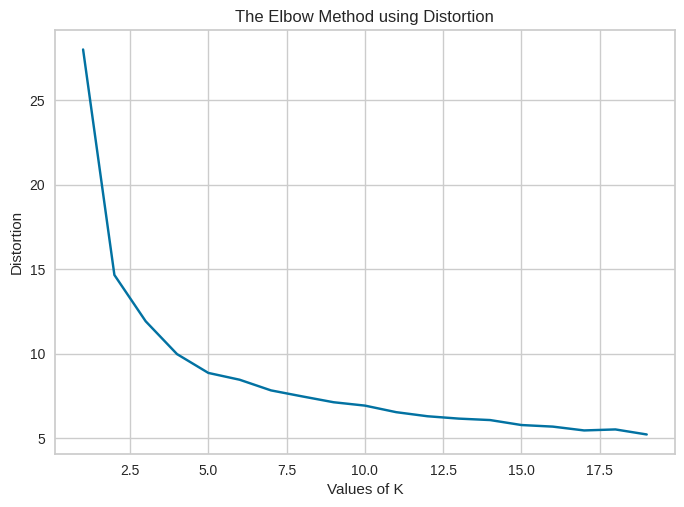

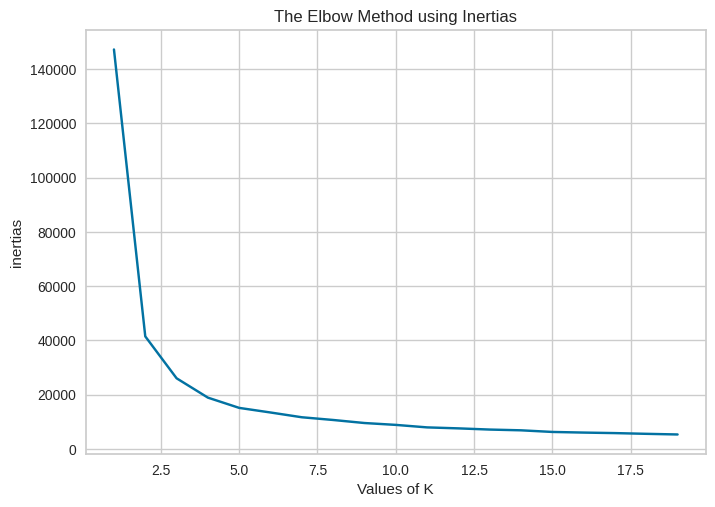

In [24]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('inertias')
plt.title('The Elbow Method using Inertias')
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


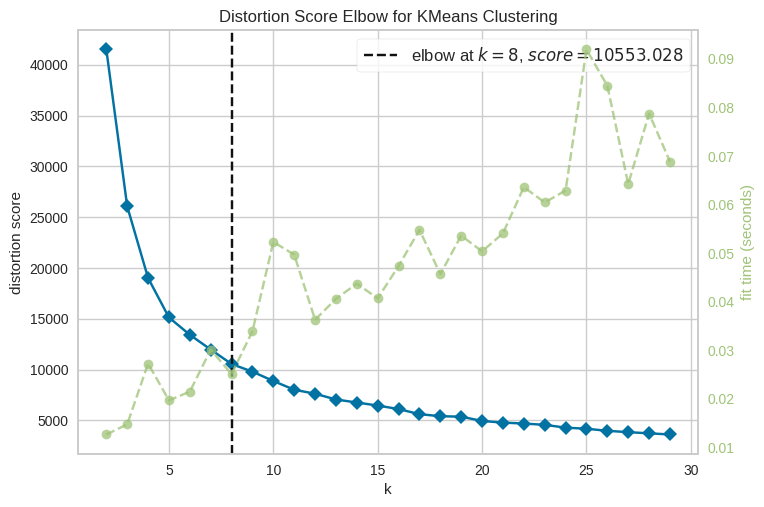

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
!pip install yellowbrick # A shortcut to what we did in the previous chunk 
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(data)        # Fit data to visualizer
visualizer.show() 

In [20]:
## Let's explore! 




# Let's plot the new clustering results.






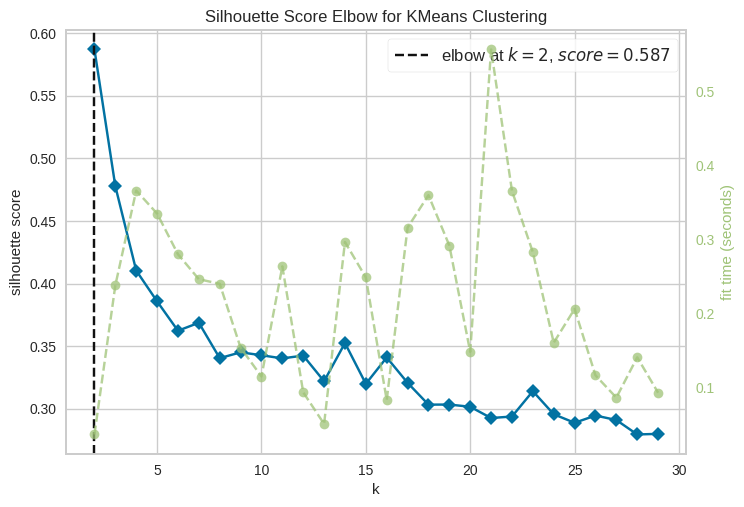

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [25]:
"""
Silhouette Coefficient: S(i) = ( b(i) - a(i))  / max{a(i), b(i)}
where b(i) is the smallest average distance of point i to all points in any other cluster and ; 
a(i) is the average distance of i from all other points in its cluster.

- S(i) close to 0 means that the point is between two clusters
- If it is closer to -1, then the point belongs to the _______  cluster
- If S(i) is close to 1, then the point belongs to the _______  cluster
"""

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()   



### Method 2: Hierarchical Clustering

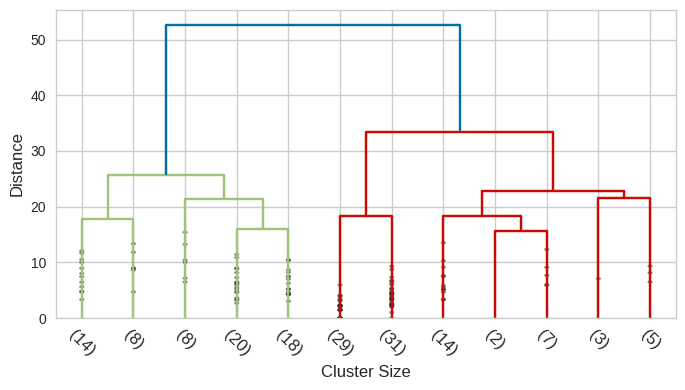

In [31]:
import matplotlib.pyplot as plt # this is to plot our results 
from scipy.cluster.hierarchy import dendrogram, linkage # this is to define a linkage method
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 4))

################ Let's define a linkage method 


Z = linkage(data, 'average') 

dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=-45.,
           leaf_font_size=12., show_contracted=True)

plt.xlabel('Cluster Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
#plt.axhline(y=30, linestyle='dashed')
plt.show()




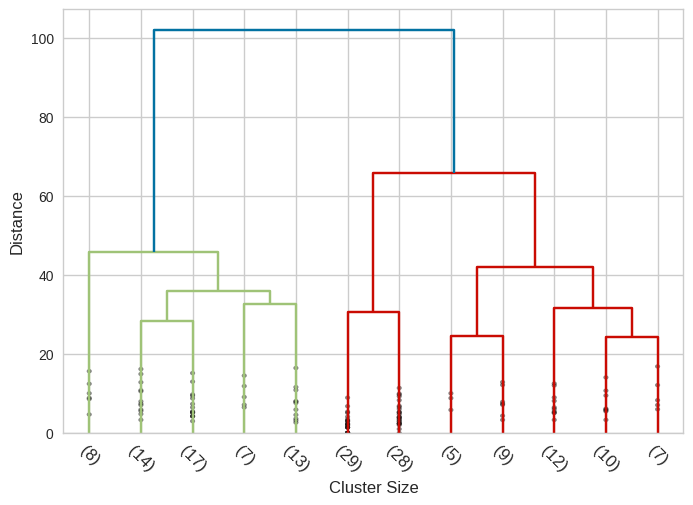

In [32]:
# Let's explore with the "Complete" linkage method

Z = linkage(data, 'complete') 

dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=-45.,
           leaf_font_size=12., show_contracted=True)

plt.xlabel('Cluster Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
#plt.axhline(y=30, linestyle='dashed')
plt.show()



In [ ]:
# Let's explore with the "Single" linkage method



#### Finding the Optimal K (Dendrogram, Silhouette)

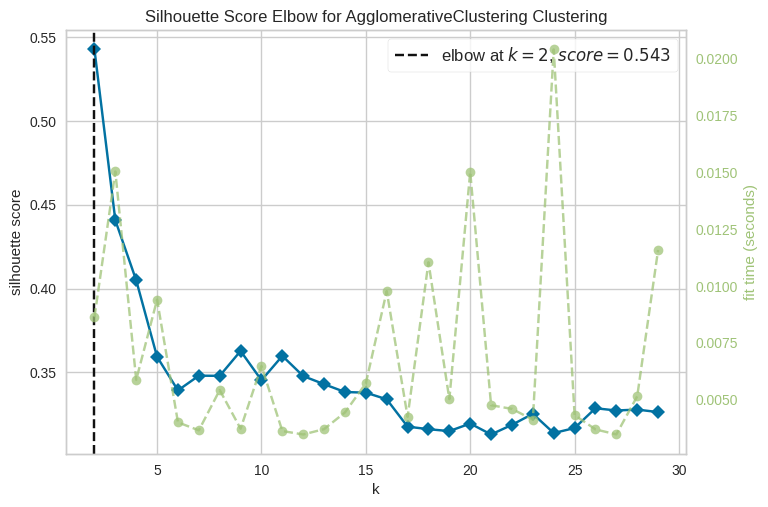

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [35]:
# This is how we will fit the clustering model 
k=3
cluster = AgglomerativeClustering(n_clusters=k, 
                                  affinity='euclidean',  # decide the distance measure 
                                  linkage='average') #decide the linkage method 
ac_labels = cluster.fit_predict(data)
ac_labels


# Let's try to find the optimal K 

from yellowbrick.cluster import KElbowVisualizer
model =  AgglomerativeClustering ( affinity='euclidean',  # decide the distance measure 
                                  linkage='average') #decide the linkage method 
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()   

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
> "Finds core samples of high density and expands clusters from them.\
> Good for data which contains clusters of similar density" (scikit-learn, n.d.).
> - Link: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Counter({-1: 67, 0: 61, 1: 31})


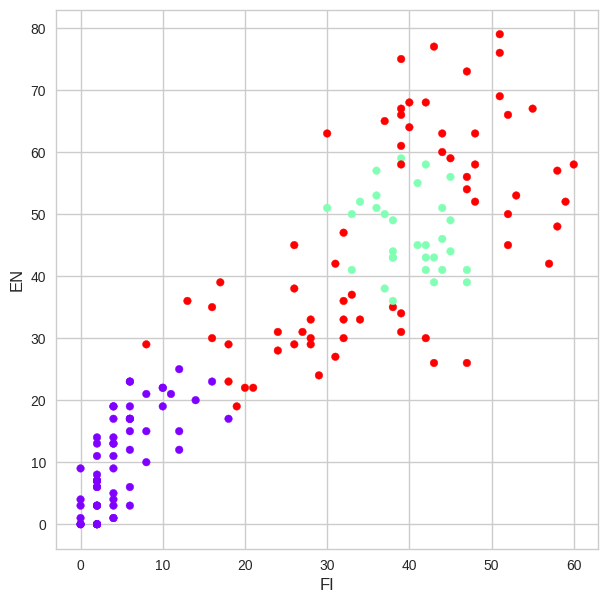

In [47]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN

%matplotlib inline
plt.figure(figsize=(7, 7))

model = DBSCAN(eps=8.0, min_samples=8).fit(data)
dbscan_labels = model.labels_
print(Counter(model.labels_))

color_theme = cm.rainbow(np.linspace(0,1,len(Counter(model.labels_))))
plt.scatter(x=data.FI,y=data.EN,c=color_theme[model.labels_],s=30)
plt.xlabel(data.columns[0], fontsize=12)
plt.ylabel(data.columns[2], fontsize=12)
plt.show()


#### Finding the Optimal K (K- nearest neighbour)

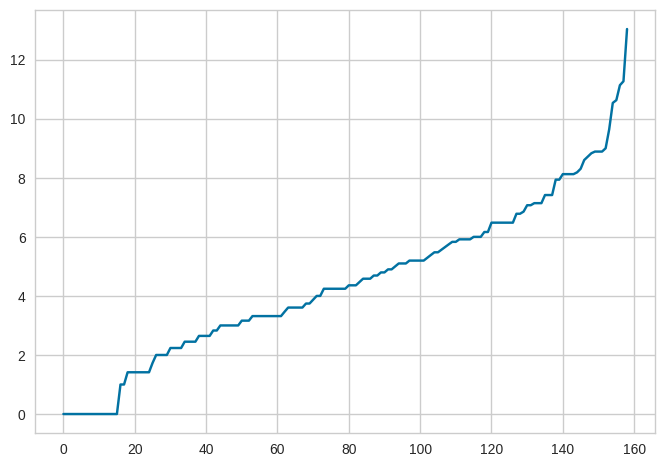

In [68]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
stdDf = pd.DataFrame(st.fit_transform(data), columns=data.columns)

"""
Calculate the average distance between each point in the data set and its N=20 nearest neighbors (my selected MinPts value).
""" 
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
"""
Plot the sorted distance 
"""
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [66]:
min_samples = range(2,20)
eps = np.arange(0.01,2, 0.01) 

output = []
from sklearn.metrics import silhouette_score

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, 
                        eps = ep).fit(data).labels_
        try: 
          score = silhouette_score(data, labels)
          output.append((ms, ep, score))
        except:
          None


In [69]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.1294613448084795
min_samples: 4
eps: 1.99


### Let's compare the model results 
> explore! `kmeans_labels`, `ac_labels`, and `dbscan_labels`\
> Let's try to put them into a dataframe.


In [ ]:
#kmeans_labels = 

In [ ]:
#ac_labels=

In [ ]:
#dbscan_labels= 

In [ ]:
result = pd.DataFrame(list(zip(kmeans_labels, ac_labels)))
result.columns = ['KC', 'HC']
result['DC'] = dbscan_labels

In [ ]:
pd.crosstab(result['HC'], result.DC)

In [ ]:
pd.crosstab(result['KC'], result.HC)

In [ ]:
pd.crosstab(result['KC'], result.DC)